# Rain Prediction Fuzzy Logic System
## Group: Fuzz & Furious
## Members:
* Leong Jing Wei (U2005251/1)
* Phang Chi Yang (U2005266/1)
* Ling Xing Mou (U2005413/1)
* Frankie Lim Qi Quan (U2005263/1)



In [ ]:
!pip install scikit-fuzzy
!pip install gradio -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import gradio as gr

## Define the Range of Inputs and Output:

In [ ]:
# Inputs
temp = np.arange(0, 40.01, 0.01)  # Temperature (Degree Celcius)
humidity = np.arange(0, 100.01, 0.01)  # Humidity (%)
wind = np.arange(0, 20.1, 0.1)  # Wind Speed (km/h)
uv_index = np.arange(0, 10.01, 0.01)  # UV Index

# Output
rain = np.arange(0, 100.01, 0.01)  # Rain probability (%)

## Define Membership Functions

In [ ]:
# Membership functions

# Temperature
temp_vl = fuzz.trapmf(temp, [0, 0, 15, 20])
temp_l = fuzz.trimf(temp, [15, 20, 25])
temp_m = fuzz.trimf(temp, [20, 25, 30])
temp_h = fuzz.trimf(temp, [25, 30, 35])
temp_vh = fuzz.trapmf(temp, [30, 35, 40, 40])

# Humidity
humidity_vl = fuzz.trapmf(humidity, [0, 0, 20, 30])
humidity_l = fuzz.trimf(humidity, [20, 30, 50])
humidity_m = fuzz.trimf(humidity, [30, 50, 60])
humidity_h = fuzz.trimf(humidity, [50, 60, 80])
humidity_vh = fuzz.trapmf(humidity, [60, 80, 100, 100])

# Wind Speed
wind_vl = fuzz.trapmf(wind, [0, 0, 2, 4])
wind_l = fuzz.trimf(wind, [2, 4, 6])
wind_m = fuzz.trimf(wind, [4, 7, 9])
wind_h = fuzz.trapmf(wind, [7, 9, 12, 16])
wind_vh = fuzz.trapmf(wind, [12, 16, 20, 20])

# UV Index
uv_l = fuzz.trapmf(uv_index, [0, 0, 2, 3])
uv_m = fuzz.trapmf(uv_index, [2, 3, 5, 6])
uv_h = fuzz.trimf(uv_index, [5, 6, 8])
uv_vh = fuzz.trapmf(uv_index, [6, 8, 10, 10])

# Precipitation
rain_l = fuzz.trapmf(rain, [0, 0, 25, 50])
rain_m = fuzz.trimf(rain, [25, 50, 75])
rain_h = fuzz.trapmf(rain, [50, 75, 100, 100])

## Visualization of Membership Functions

In [ ]:
def display_mf(input, mfs, legends, title):
  """
  Function to plot the graph of membership functions.
  """
  plt.title(title)
  for mf in mfs:
    plt.plot(input, mf)
  plt.legend(legends)
  plt.show()

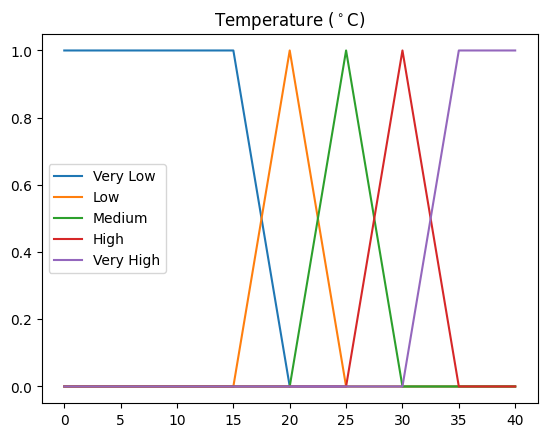

In [ ]:
display_mf(temp, [temp_vl, temp_l, temp_m, temp_h, temp_vh], ["Very Low", "Low", "Medium", "High", "Very High"], "Temperature ($^\circ$C)")

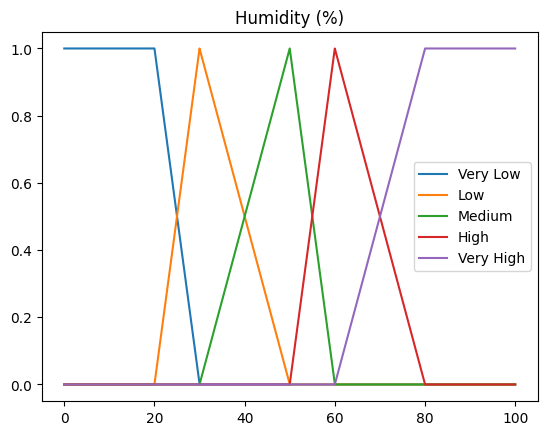

In [ ]:
display_mf(humidity, [humidity_vl, humidity_l, humidity_m, humidity_h, humidity_vh], ["Very Low", "Low", "Medium", "High", "Very High"], "Humidity (%)")

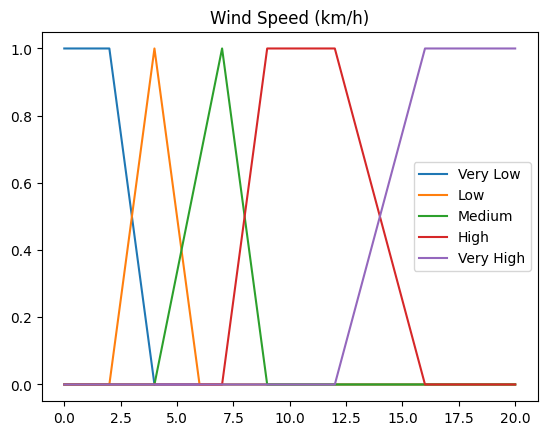

In [ ]:
display_mf(wind, [wind_vl, wind_l, wind_m, wind_h, wind_vh], ["Very Low", "Low", "Medium", "High", "Very High"], "Wind Speed (km/h)")

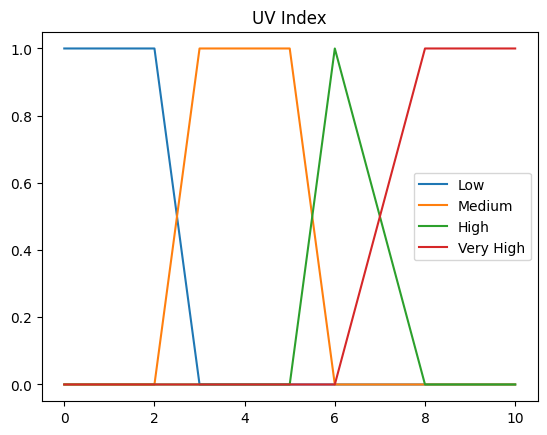

In [ ]:
display_mf(uv_index, [uv_l, uv_m, uv_h, uv_vh], ["Low", "Medium", "High", "Very High"], "UV Index")

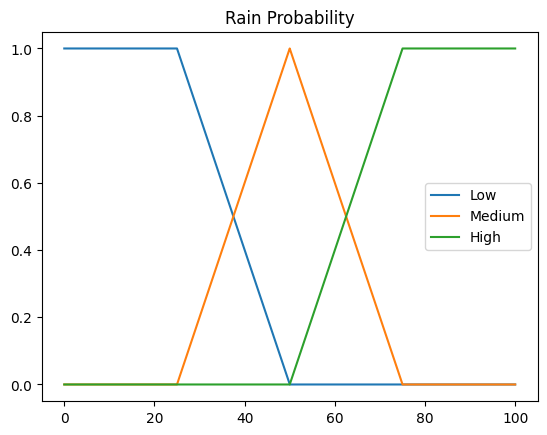

In [ ]:
display_mf(rain, [rain_l, rain_m, rain_h], ["Low", "Medium", "High"], "Rain Probability")

## Inference Engine

In [ ]:
# using skfuzzy Control

def inference_engine(temp_universe, humidity_universe, wind_universe, uv_index_universe, rain_universe, defuzzify_method):
    # Create fuzzy variables
    temp = ctrl.Antecedent(temp_universe, 'temperature')
    humidity = ctrl.Antecedent(humidity_universe, 'humidity')
    wind = ctrl.Antecedent(wind_universe, 'wind')
    uv_index = ctrl.Antecedent(uv_index_universe, 'uv_index')
    rain = ctrl.Consequent(rain_universe, 'rain', defuzzify_method=defuzzify_method)

    # Assign the membership functions to the fuzzy variables
    temp['vl'] = temp_vl
    temp['l'] = temp_l
    temp['m'] = temp_m
    temp['h'] = temp_h
    temp['vh'] = temp_vh

    humidity['vl'] = humidity_vl
    humidity['l'] = humidity_l
    humidity['m'] = humidity_m
    humidity['h'] = humidity_h
    humidity['vh'] = humidity_vh

    wind['vl'] = wind_vl
    wind['l'] = wind_l
    wind['m'] = wind_m
    wind['h'] = wind_h
    wind['vh'] = wind_vh

    uv_index['l'] = uv_l
    uv_index['m'] = uv_m
    uv_index['h'] = uv_h
    uv_index['vh'] = uv_vh

    rain['l'] = rain_l
    rain['m'] = rain_m
    rain['h'] = rain_h

    # display membership functions
    temp.view()
    humidity.view()
    wind.view()
    uv_index.view()
    rain.view()

    # Knowledge base (Rules definition)
    rule1 = ctrl.Rule((temp['vl'] | temp['vh']) & (humidity['vl'] | humidity['l']), rain['l'])  # If (temperature is very low or very high) and (humidity is very low or low), then the rain probability is low.
    rule2 = ctrl.Rule((temp['vh'] | temp['h']) & (uv_index['vh'] | uv_index['h']), rain['l'])   # If (temperature is very high or high) and (uv index is very high or high), then the rain probability is low.
    rule3 = ctrl.Rule((temp['vh'] | temp['h']) & (wind['vl'] | wind['l']), rain['l'])           # If (temperature is very high or high) and (wind speed is very low or low), then the rain probability is low.
    rule4 = ctrl.Rule((humidity['vl'] | humidity['l']) & (wind['vl'] | wind['l']), rain['l'])   # If (humidity is very low or low) and (wind speed is very low or low), then the rain probability is low.

    rule5 = ctrl.Rule(temp['m'] & (humidity['m'] | wind['m'] | uv_index['m']), rain['m'])       # If temperature is medium and (humidity is medium or wind speed is medium or uv index is medium), then the rain probability is medium.
    rule6 = ctrl.Rule(humidity['m'] & (wind['m'] | uv_index['m']), rain['m'])                   # If humidity is medium and (wind speed is medium or uv index is medium), then the rain probability is medium.
    rule7 = ctrl.Rule(wind['m'] & uv_index['m'], rain['m'])                                     # If wind speed is medium and uv index is medium, then the rain probability is medium.

    rule8 = ctrl.Rule((temp['l'] | temp['h']) & (humidity['h'] | humidity['vh']), rain['h'])    # If (temperature is low or high) and (humidity is high or very high), then the rain probability is high.
    rule9 = ctrl.Rule(temp['l'] & uv_index['l'], rain['h'])                                     # If temperature is low and uv index is low, then the rain probability is high.
    rule10 = ctrl.Rule((temp['vl'] | temp['l']) & (wind['vh'] | wind['h']), rain['h'])          # If (temperature is very low or low) and (wind speed is very high or high), then the rain probability is high.
    rule11 = ctrl.Rule((humidity['vh'] | humidity['h']) & (wind['vh'] | wind['h']), rain['h'])  # If (humidity is very high or high) and (wind speed is very high or high), then the rain probability is high.

    knowledgeBase = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11]

    # Create the control system
    rain_ctrl = ctrl.ControlSystem(knowledgeBase)
    rain_sim = ctrl.ControlSystemSimulation(rain_ctrl)

    return rain_sim

80.5555555555555


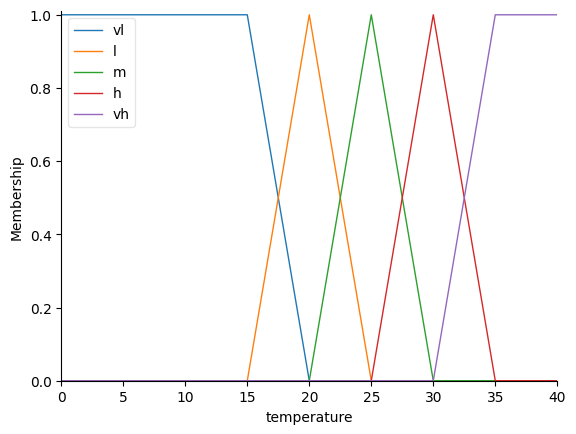

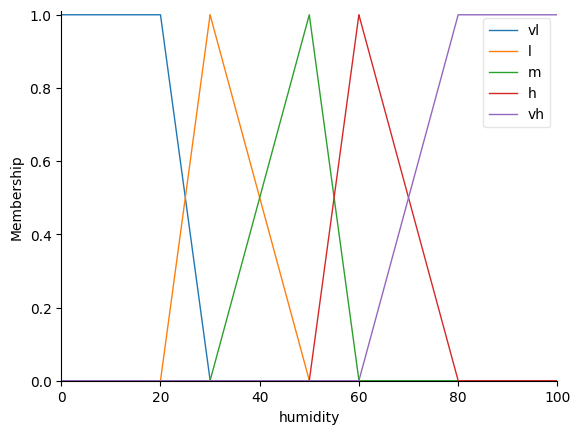

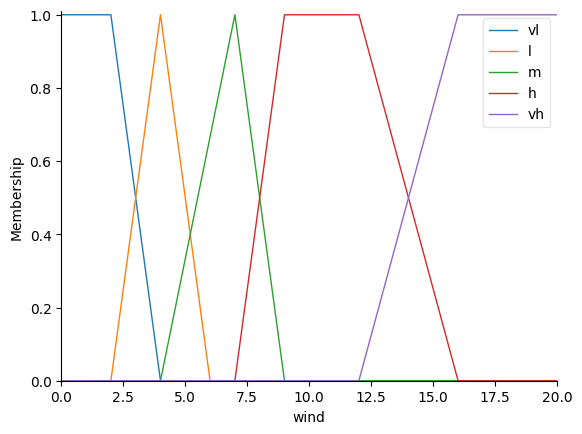

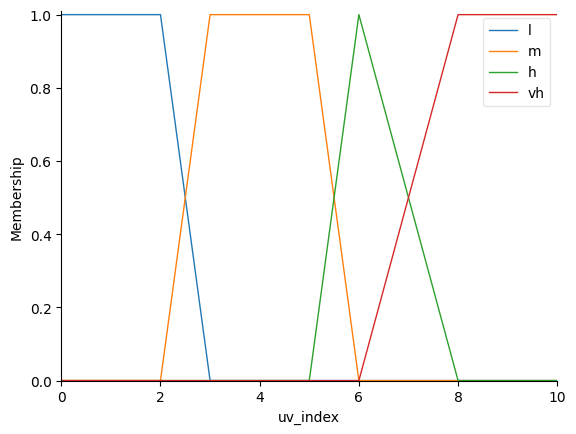

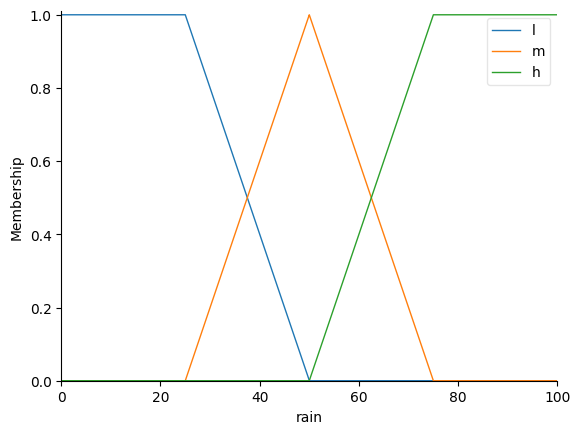

In [ ]:
# Testing input and output
rain_sim = inference_engine(temp, humidity, wind, uv_index, rain, defuzzify_method="centroid")

# Set the input values
rain_sim.input['temperature'] = 15
rain_sim.input['humidity'] = 80
rain_sim.input['wind'] = 30
rain_sim.input['uv_index'] = 5

rain_sim.compute()

print(rain_sim.output['rain'])

## Main Program

In [ ]:
class FuzzAndFurious():

    def __init__(self, defuzzify_method="centroid"):
        # Define inputs and output
        temp = ctrl.Antecedent(np.arange(0, 40.01, 0.01), 'temperature')        # Temperature (Degree Celcius)
        humidity = ctrl.Antecedent(np.arange(0, 100.01, 0.01) , 'humidity')     # Humidity (%)
        wind = ctrl.Antecedent(np.arange(0, 20.1, 0.1), 'wind_speed')           # Wind Speed (km/h)
        uv_index = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'uv_index')       # UV Index
        rain = ctrl.Consequent(np.arange(0, 100.01, 0.01), 'rain_probability', defuzzify_method)  # Rain probability (%)

        # Define the membership functions
        temp['vl'] = fuzz.trapmf(temp.universe, [0, 0, 15, 20])
        temp['l'] = fuzz.trimf(temp.universe, [15, 20, 25])
        temp['m'] = fuzz.trimf(temp.universe, [20, 25, 30])
        temp['h'] = fuzz.trimf(temp.universe, [25, 30, 35])
        temp['vh'] = fuzz.trapmf(temp.universe, [30, 35, 40, 40])

        humidity['vl'] = fuzz.trapmf(humidity.universe, [0, 0, 20, 30])
        humidity['l'] = fuzz.trimf(humidity.universe, [20, 30, 50])
        humidity['m'] = fuzz.trimf(humidity.universe, [30, 50, 60])
        humidity['h'] = fuzz.trimf(humidity.universe, [50, 60, 80])
        humidity['vh'] = fuzz.trapmf(humidity.universe, [60, 80, 100, 100])

        wind['vl'] = fuzz.trapmf(wind.universe, [0, 0, 2, 4])
        wind['l'] = fuzz.trimf(wind.universe, [2, 4, 6])
        wind['m'] = fuzz.trimf(wind.universe, [4, 7, 9])
        wind['h'] = fuzz.trapmf(wind.universe, [7, 9, 12, 16])
        wind['vh'] = fuzz.trapmf(wind.universe, [12, 16, 20, 20])

        uv_index['l'] = fuzz.trapmf(uv_index.universe, [0, 0, 2, 3])
        uv_index['m'] = fuzz.trapmf(uv_index.universe, [2, 3, 5, 6])
        uv_index['h'] = fuzz.trimf(uv_index.universe, [5, 6, 8])
        uv_index['vh'] = fuzz.trapmf(uv_index.universe, [6, 8, 10, 10])

        rain['l'] = fuzz.trapmf(rain.universe, [0, 0, 25, 50])
        rain['m'] = fuzz.trimf(rain.universe, [25, 50, 75])
        rain['h'] = fuzz.trapmf(rain.universe, [50, 75, 100, 100])

        self.temp = temp
        self.humidity = humidity
        self.wind = wind
        self.uv_index = uv_index
        self.rain = rain

        # Knowledge base (Rules definition)
        rule1 = ctrl.Rule((temp['vl'] | temp['vh']) & (humidity['vl'] | humidity['l']), rain['l'], label="Rule 1")  # If (temperature is very low or very high) and (humidity is very low or low), then the rain probability is low.
        rule2 = ctrl.Rule((temp['vh'] | temp['h']) & (uv_index['vh'] | uv_index['h']), rain['l'], label="Rule 2")   # If (temperature is very high or high) and (uv index is very high or high), then the rain probability is low.
        rule3 = ctrl.Rule((temp['vh'] | temp['h']) & (wind['vl'] | wind['l']), rain['l'], label="Rule 3")           # If (temperature is very high or high) and (wind speed is very low or low), then the rain probability is low.
        rule4 = ctrl.Rule((humidity['vl'] | humidity['l']) & (wind['vl'] | wind['l']), rain['l'], label="Rule 4")   # If (humidity is very low or low) and (wind speed is very low or low), then the rain probability is low.

        rule5 = ctrl.Rule(temp['m'] & (humidity['m'] | wind['m'] | uv_index['m']), rain['m'], label="Rule 5")       # If temperature is medium and (humidity is medium or wind speed is medium or uv index is medium), then the rain probability is medium.
        rule6 = ctrl.Rule(humidity['m'] & (wind['m'] | uv_index['m']), rain['m'], label="Rule 6")                   # If humidity is medium and (wind speed is medium or uv index is medium), then the rain probability is medium.
        rule7 = ctrl.Rule(wind['m'] & uv_index['m'], rain['m'], label="Rule 7")                                     # If wind speed is medium and uv index is medium, then the rain probability is medium.

        rule8 = ctrl.Rule((temp['l'] | temp['h']) & (humidity['h'] | humidity['vh']), rain['h'], label="Rule 8")    # If (temperature is low or high) and (humidity is high or very high), then the rain probability is high.
        rule9 = ctrl.Rule(temp['l'] & uv_index['l'], rain['h'], label="Rule 9")                                     # If temperature is low and uv index is low, then the rain probability is high.
        rule10 = ctrl.Rule((temp['vl'] | temp['l']) & (wind['vh'] | wind['h']), rain['h'], label="Rule 10")          # If (temperature is very low or low) and (wind speed is very high or high), then the rain probability is high.
        rule11 = ctrl.Rule((humidity['vh'] | humidity['h']) & (wind['vh'] | wind['h']), rain['h'], label="Rule 11")  # If (humidity is very high or high) and (wind speed is very high or high), then the rain probability is high.

        knowledgeBase = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11]

        # Create the control system
        rain_ctrl = ctrl.ControlSystem(knowledgeBase)
        self.rain_sim = ctrl.ControlSystemSimulation(rain_ctrl)


    def compute(self, temperature, humidity, wind_speed, uv_index):
        self.rain_sim.input['temperature'] = temperature
        self.rain_sim.input['humidity'] = humidity
        self.rain_sim.input['wind_speed'] = wind_speed
        self.rain_sim.input['uv_index'] = uv_index
        self.rain_sim.compute()
        return self.rain_sim.output['rain_probability']


    def view(self):
        # Display membership functions
        self.temp.view(sim=self.rain_sim)
        self.humidity.view(sim=self.rain_sim)
        self.wind.view(sim=self.rain_sim)
        self.uv_index.view(sim=self.rain_sim)
        self.rain.view(sim=self.rain_sim)
        return plt.gcf()


In [ ]:
def predict_rain(temperature, humidity, wind_speed, uv_index, defuzzify_method="centroid"):
    fuzzy_system = FuzzAndFurious(defuzzify_method)
    rain_prob = fuzzy_system.compute(temperature, humidity, wind_speed, uv_index)
    fig = fuzzy_system.view()
    return f"{rain_prob:.2f}", fig

In [ ]:
def main():
    print("Please input temperature in °C within (0-40):")
    input_temp = float(input())
    print("Please input humidity in % within (0-100):")
    input_humidity = float(input())
    print("Please input wind speed in km/h within (0-20):")
    input_wind = float(input())
    print("Please input UV index within (0-10):")
    input_uv = float(input())

    rain_prob, fig = predict_rain(input_temp, input_humidity, input_wind, input_uv)
    print(f"Rain probability: {rain_prob}%")


Please input temperature in °C within (0-40):
30
Please input humidity in % within (0-100):
10
Please input wind speed in km/h within (0-20):
3
Please input UV index within (0-10):
8
Rain probability: 19.44%


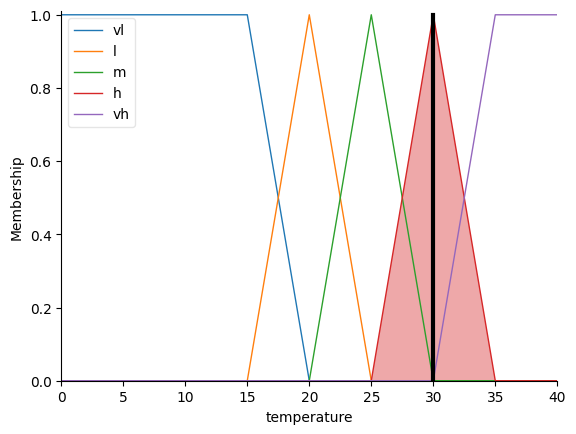

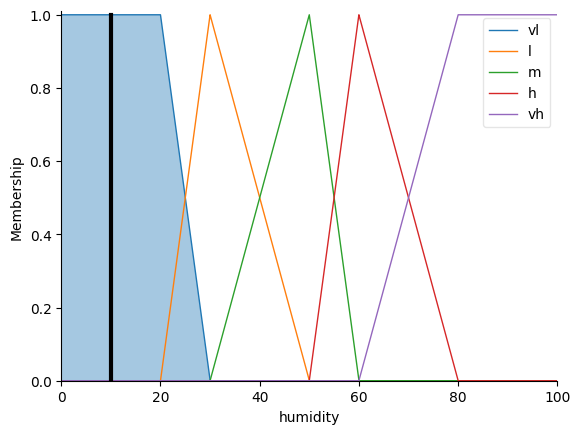

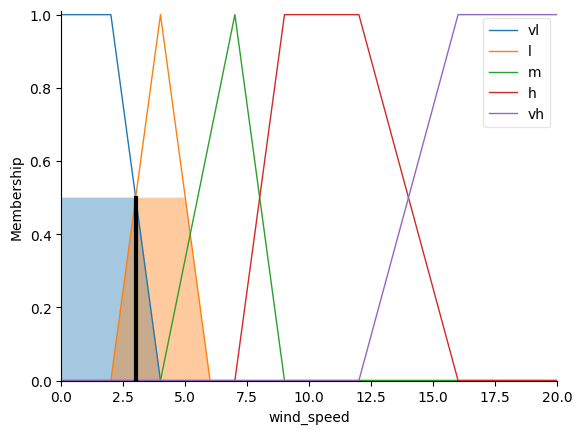

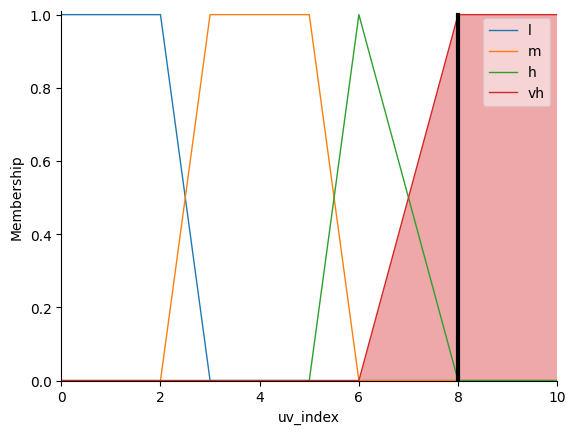

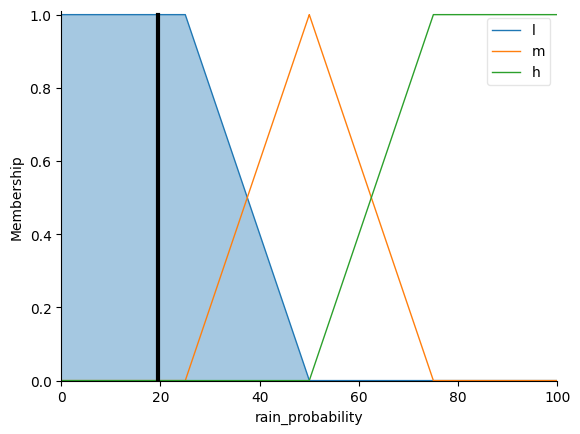

In [ ]:
main()

Please input temperature in °C within (0-40):
20
Please input humidity in % within (0-100):
42
Please input wind speed in km/h within (0-20):
12
Please input UV index within (0-10):
4
Rain probability: 70.43%


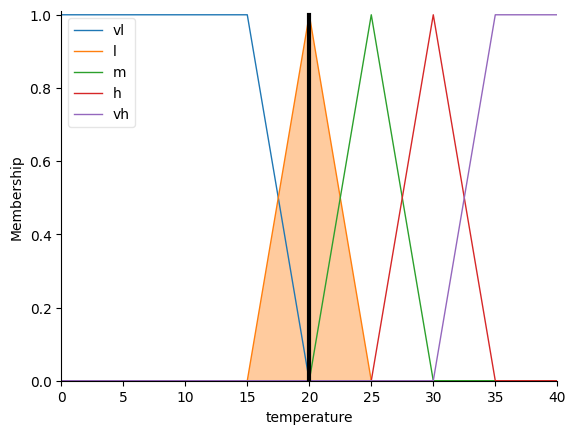

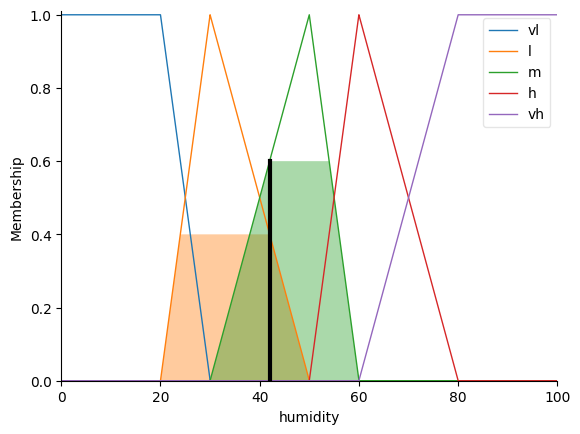

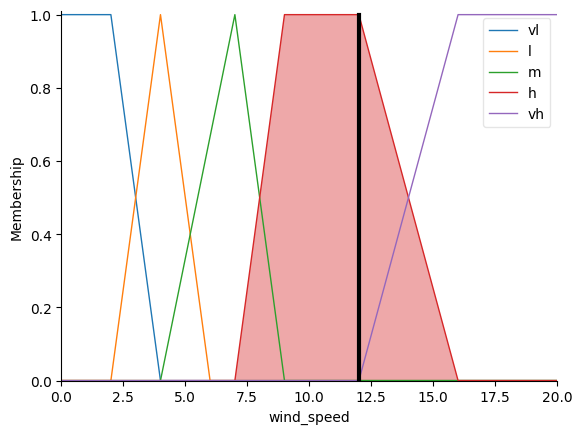

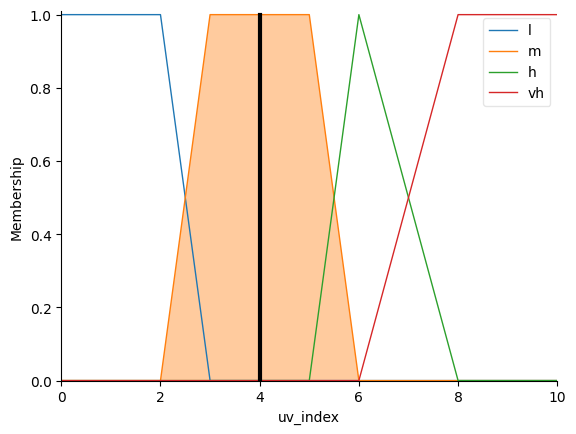

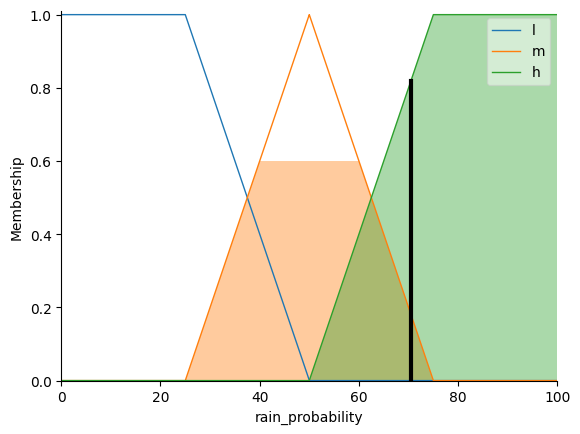

In [ ]:
main()

Please input temperature in °C within (0-40):
40
Please input humidity in % within (0-100):
100
Please input wind speed in km/h within (0-20):
20
Please input UV index within (0-10):
10
Rain probability: 50.00%


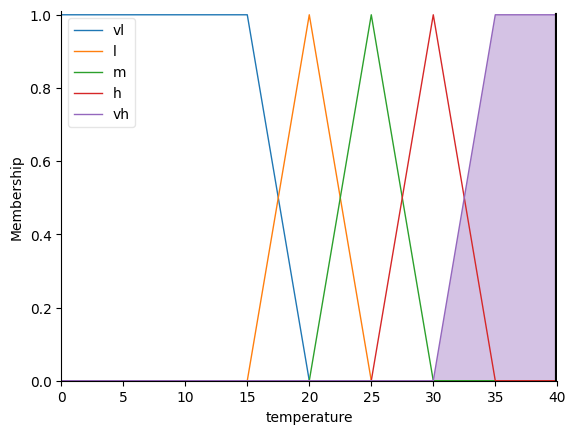

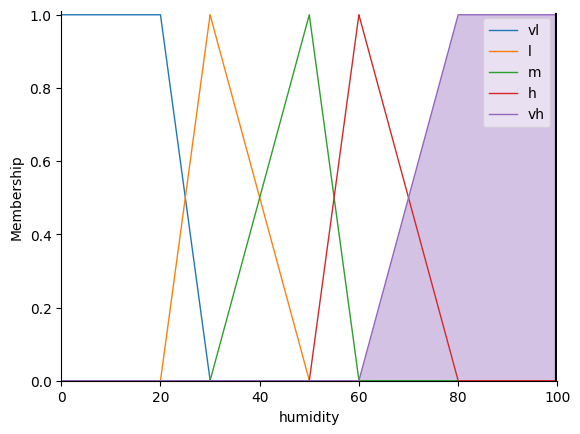

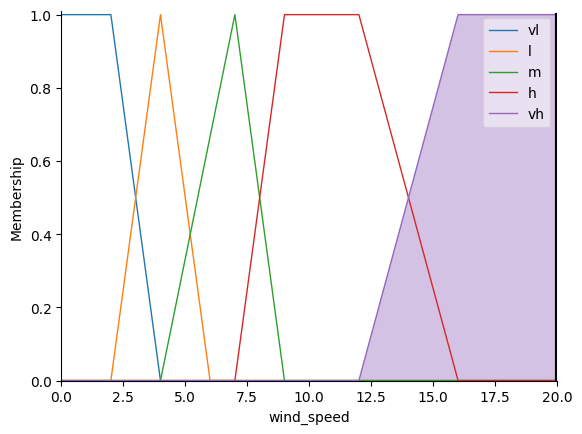

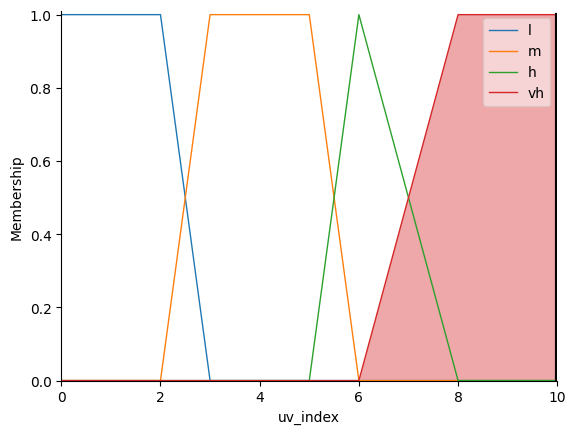

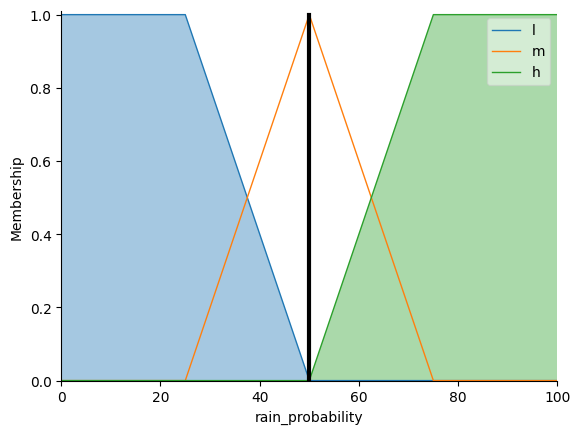

In [ ]:
main()

In [ ]:
demo = gr.Interface(
    fn=predict_rain,
    inputs=[
        gr.Slider(0, 40, step=0.01, value=20, label="Temperature (°C)"),
        gr.Slider(0, 100, step=0.01, value=50, label="Humidity (%)"),
        gr.Slider(0, 20, step=0.1, value=10, label="Wind Speed (km/h)"),
        gr.Slider(0, 10, step=0.01, value=5, label="UV Index"),
        gr.Radio(choices=[
            ("Centroid", "centroid"),
            ("Bisector of Area", "bisector"),
            ("Mean of Maxima", "mom"),
            ("First of Maxima", "som"),
            ("Last of maxima", "lom"),
        ]),
    ],
    outputs=[
        gr.Text(label="Rain Probability (%)"),
        gr.Plot(label="Fuzzy Output"),
    ],
    title="⛈️ Rain Prediction",
    description="Predict rain probability based on temperature, humidity, wind speed, and UV index.",
    allow_flagging="never",
)

demo.launch(share=False, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
